# Hands-on at the ARMI Terminal

This tutorial will walk you through some exploration with ARMI on the command
line with the goal of exposing you to some of the capabilities
and organization of information in the ARMI system.

## Initializing and Exploring the ARMI Model
First we need to get some inputs. We built some from scratch in the, and we pick those up and use them here as well:


You can load these inputs using armi's ``init`` function. This will build an **Operator**, a **Reactor**, and an **Interface Stack** full of various interfaces.

In [1]:
# you can only configure an app once
import armi
if not armi.isConfigured():
    armi.configure(armi.apps.App())


                       ---------------------------------------------------
                      |             _      ____     __  __    ___         |
                      |            / \    |  _ \   |  \/  |  |_ _|        |
                      |           / _ \   | |_) |  | |\/| |   | |         |
                      |          / ___ \  |  _ <   | |  | |   | |         |
                      |         /_/   \_\ |_| \_\  |_|  |_|  |___|        |
                      |         Advanced  Reactor  Modeling Interface     |
                       ---------------------------------------------------
                                      Version 0.1.4     



In [2]:
o=armi.init(fName="anl-afci-177.yaml");

=========== Case Information ===========
[info] ---------------------  ------------------------------------------------------------
       Case Title:            anl-afci-177
       Case Description:      ANL-AFCI-177 CR 1.0 metal core but with HALEU instead of TRU
       Run Type:              Standard - Operator
       Current User:          nick
       ARMI Location:         /home/nick/code/armi/armi
       Working Directory:     /home/nick/code/armi/doc/user/tutorials
       Python Interpreter:    3.8.2 (default, Apr 27 2020, 15:53:34)
                              [GCC 9.3.0]
       Master Machine:        ?
       Number of Processors:  1
       Date and Time:         Mon Jun  8 23:19:49 2020
       ---------------------  ------------------------------------------------------------
=========== Input File Information ===========
[info] -------------------  ------------------------------  ------------
       Input Type           Path                            SHA-1 Hash
       ----

[warn] The gap between wire wrap and clad in block <fuel BxxxD at ExCore XS: A BU GP: A> was -0.02012500000000006 cm. Expected 0.0.
[warn] The gap between wire wrap and clad in block <fuel BxxxE at ExCore XS: A BU GP: A> was -0.02012500000000006 cm. Expected 0.0.
[warn] The gap between wire wrap and clad in block <fuel BxxxF at ExCore XS: A BU GP: A> was -0.02012500000000006 cm. Expected 0.0.
[warn] The gap between wire wrap and clad in block <plenum BxxxG at ExCore XS: A BU GP: A> was -0.02012500000000006 cm. Expected 0.0.
[info] Constructing assembly `middle core fuel`
[warn] Some component was missing in <reflector BxxxA at ExCore XS: B BU GP: A> so pin-to-duct gap not calculated
[warn] The gap between wire wrap and clad in block <fuel BxxxB at ExCore XS: B BU GP: A> was -0.02012500000000006 cm. Expected 0.0.
[warn] The gap between wire wrap and clad in block <fuel BxxxC at ExCore XS: B BU GP: A> was -0.02012500000000006 cm. Expected 0.0.
[warn] The gap between wire wrap and clad in

=========== Summarizing Source of Material Data for <Core: core id:139675387753808> ===========
[info] ---------------  -----------------  ----------------------------
       Material Name    Source Location    Property Data was Modified
                                           from the Source?
       ---------------  -----------------  ----------------------------
       B4C              ARMI               False
       HT9              ARMI               False
       Sodium           ARMI               False
       UZr              ARMI               False
       Void             ARMI               False
       ---------------  -----------------  ----------------------------
=========== Applying Geometry Modifications ===========
[info] Updating spatial grid pitch data for hex geometry
=========== Initializing Mesh, Assembly Zones, and Nuclide Categories =========== 


[info] Nuclide categorization for cross section temperature assignments:
       ------------------  -------------------------------------------------------------
       Nuclide Category    Nuclides
       ------------------  -------------------------------------------------------------
       Fuel                ZR96, PU240, AM242, CM244, HE4, PU238, ZR91, U236, PU236,
                           NP237, LFP41, CM246, PU239, AM241, CM247, PU242, DUMP2, ZR92,
                           ZR94, U234, CM245, LFP35, LFP40, LFP39, LFP38, U238,
                           AM243, CM242, NP238, U235, DUMP1, PU241, ZR90, CM243
       Coolant             NA23
       Structure           W183, SI29, NI64, MO96, NI62, CR53, NI60, NI58,
                           FE56, W182, CR50, MO97, FE57, MO95, SI28, NI61,
                           C, CR52, MO98, CR54, MN55, W186, FE54, MO92,
                           B10, FE58, B11, V, MO94, W184, MO100, SI30
       ------------------  ----------------------------

In [3]:
core = o.r.core
core.getAssemblies()[:25] # only print the first 25

[<inner fuel Assembly A0007 at A1001>,
 <inner fuel Assembly A0013 at A2001>,
 <inner fuel Assembly A0018 at A2002>,
 <inner fuel Assembly A0019 at A3001>,
 <inner fuel Assembly A0024 at A3002>,
 <inner fuel Assembly A0029 at A3003>,
 <inner fuel Assembly A0008 at A3012>,
 <ultimate shutdown Assembly A0025 at A4001>,
 <middle core fuel Assembly A0030 at A4002>,
 <middle core fuel Assembly A0036 at A4003>,
 <control Assembly A0041 at A4004>,
 <middle core fuel Assembly A0035 at A4005>,
 <middle core fuel Assembly A0014 at A4018>,
 <middle core fuel Assembly A0031 at A5001>,
 <middle core fuel Assembly A0037 at A5002>,
 <middle core fuel Assembly A0042 at A5003>,
 <middle core fuel Assembly A0048 at A5004>,
 <middle core fuel Assembly A0054 at A5005>,
 <middle core fuel Assembly A0047 at A5006>,
 <middle core fuel Assembly A0009 at A5023>,
 <middle core fuel Assembly A0020 at A5024>,
 <middle core fuel Assembly A0038 at A6001>,
 <middle core fuel Assembly A0043 at A6002>,
 <middle core f

You can drill down the hierarchy for a particular assembly:

In [4]:
core = o.r[0]
print(core)
assem = core[1]
print(assem)
block = assem[5]
print(block)
print(f"Block's parent is: {block.parent}")
components = block.getChildren()
print(components)
material = components[0].material
print(material)

<Core: core id:139675387753808>
<inner fuel Assembly A0008 at A3012>
<fuel B0008F at A3012F XS: A BU GP: A>
Block's parent is: <inner fuel Assembly A0008 at A3012>
[<Circle: clad>, <Helix: wire>, <Circle: fuel>, <Circle: bond>, <Hexagon: duct>, <Hexagon: intercoolant>, <DerivedShape: coolant>]
<Material: HT9>


## Exploring the *state* of the reactor
State can be explored using a variety of framework methods, as well as looking at state *parameters*. Let's first try out some methods to find out how much U-235 is in the model and what the average uranium enrichment is:

In [5]:
u235 = core.getMass('U235')
u238 = core.getMass('U238')
print(f"The core contains {u235} grams of U-235")
print(f"The average fissile enrichment is {u235/(u235+u238)}")

The core contains 912822.5942999555 grams of U-235
The average fissile enrichment is 0.16152980132450295


That's how much U-235 is in the 1/3 core. If we want the total mass (including all nuclides), we can just leave the argument out:

In [6]:
core.getMass()/1.e6

30.100147310763905

In [7]:
core.getMass?

Furthermore, you can get a list of available methods by pressing the tab key. Try `core.` followed by `[Tab]`. Try out some options!

Next, lets find out what the number density of U235 is in a particular fuel block. We'll use the *FLAGS* system to select a particular type of block (in this case, a fuel block):

In [8]:
from armi.reactor.flags import Flags
b = core.getFirstBlock(Flags.FUEL)
print(f"U-235 ndens: {b.getNumberDensity('U235'):.4e} (atoms/bn-cm)")
print(f"Block name: {b.getName()}")
print(f"Block type: {b.getType()}")

U-235 ndens: 1.5935e-03 (atoms/bn-cm)
Block name: B0007B
Block type: fuel


You can find lots of other details about this block with:

In [9]:
b.printContents(includeNuclides=False)

[impt] <fuel B0007B at A1001B XS: A BU GP: A>
[impt] <Circle: clad>
[impt] ---------------------------------------------------------------------------------------------
       Cladding Dimensions -  Of First Fuel Block
                                      Tcold (25.0)                   Thot (450.0)                   
       ---------------------------------------------------------------------------------------------
       Inner Diameter (cm)            0.6962                         0.6996347645979837             
       Material                       HT9                                                           
       Multiplicity                   271                            271                            
       Name                           clad                                                          
       Outer Diameter (cm)            0.808                          0.8119863398379357             
       Thickness (cm)                 0.0559000                      0.056

## Modifying the state of the reactor
Each object in the Reactor model has a bunch of *state parameters* contained in it's special `.p` attribute, called it's *Parameter Collection*). The state parameters are defined both by the ARMI framework and the collection of plugins. For instance, you can look at the core's keff parameters or each individual block's power and multi-group flux parameters like this:

In [10]:
print(b.p.power)
print(core.p.keff)
print(b.p.mgFlux)

0.0
0.0
None


As you might expect, the values are zero because we have not performed any physics calculations yet. We could run a physics plugin at this point to add physics state, but for this tutorial, we'll just apply dummy data. Here's a fake physics kernel that just sets a power distribution based on spatial location of each block (e.g. a spherical distribution):

In [11]:
import numpy as np
midplane = core[0].getHeight()/2.0
center = np.array([0,0,midplane])
peakPower = 1e6
mgFluxBase = np.arange(5)
def setFakePower(core):
    for a in core:
        for b in a:
            vol = b.getVolume()
            coords = b.spatialLocator.getGlobalCoordinates()
            r = np.linalg.norm(abs(coords-center))
            fuelFlag = 10 if b.isFuel() else 1.0
            b.p.power = peakPower / r**2 * fuelFlag
            b.p.pdens = b.p.power/vol
            b.p.mgFlux = mgFluxBase*b.p.pdens
setFakePower(core)

In [12]:
print(b.p.power)
print(b.p.pdens)

603.6363986253243
0.3949368453772479


Text(0.5, 1.0, 'Fake power distribution on reactor')

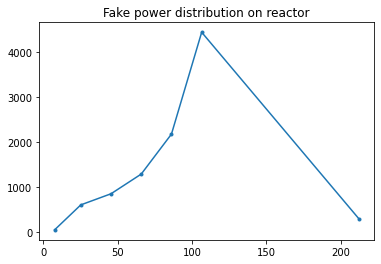

In [13]:
import matplotlib.pyplot as plt
a = b.parent
z = [b.spatialLocator.getGlobalCoordinates()[2] for b in a]
power = a.getChildParamValues('power')
plt.plot(z,power,'.-')
plt.title("Fake power distribution on reactor")

We can take a look at the spatial distribution as well:

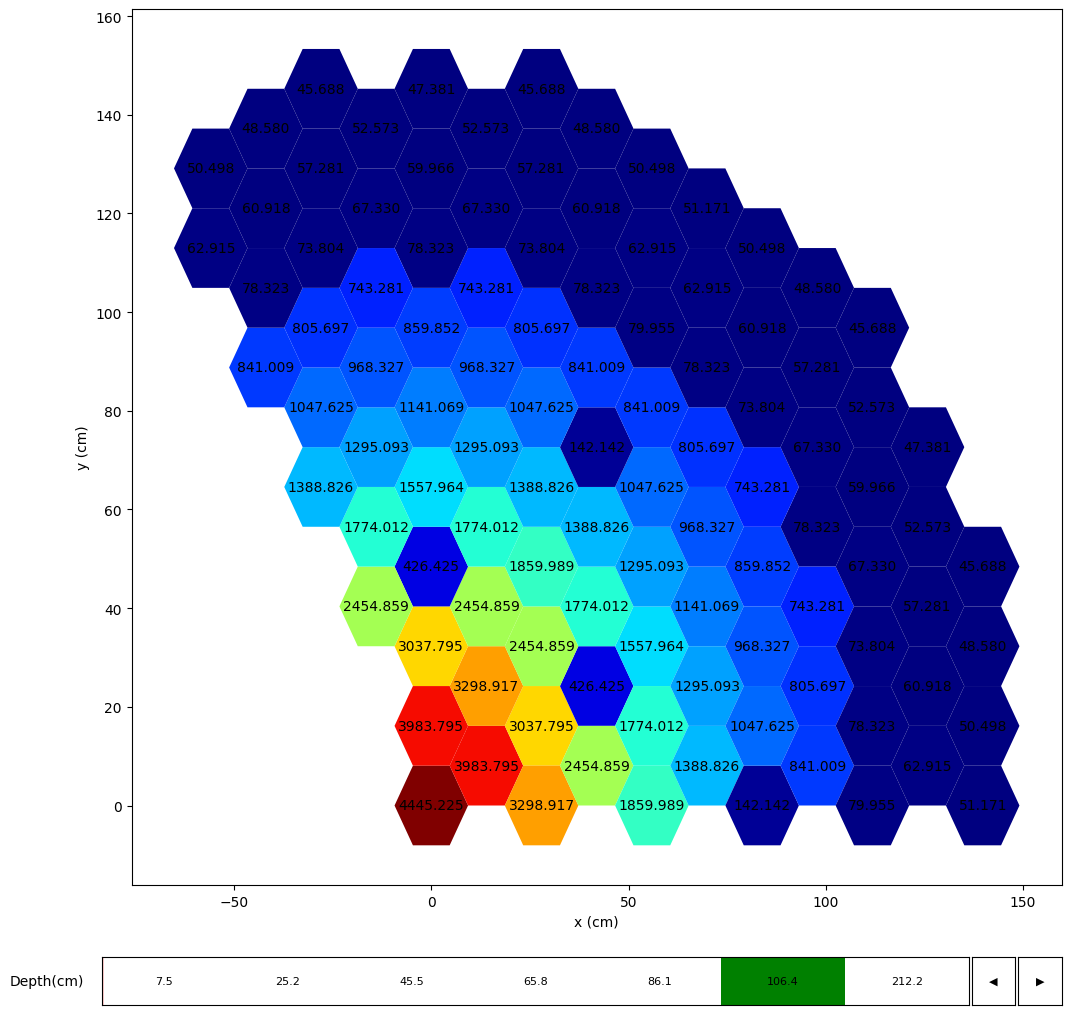

In [14]:
from armi.utils import plotting
# Note, if you were plotting outside jupyter, you could click
# on different depths at the bottom to view different axial planes.
plotting.plotBlockDepthMap(core, "power", depthIndex=5)

## Modifying number densities
Analysts frequently want to modify number densities. For example, if you needed to compute a coolant density coefficient, you could simply reduce the amount of coolant in the core. 

In [15]:
sodiumBefore = core.getMass('NA')
print(f"Before: {sodiumBefore/1e6:.2f} MT Sodium")
for b in core.getBlocks():      # loop through all blocks
    refDens = b.getNumberDensity('NA23')
    b.setNumberDensity('NA23',refDens*0.98) # reduce Na density by 2%
sodiumAfter = core.getMass('NA')
print(f"After:  {sodiumAfter/1e6:.2f} MT Sodium")

Before: 2.48 MT Sodium


After:  2.43 MT Sodium


If you analyze the keff with a physics plugin before and after, the change in the `core.p.keff` param would determine your density coefficient of reactivity. 

## Saving state to disk
During analysis, it's often useful to save the reactor state to disk in a database. The ARMI database package handles this, and writes it out to an [HDF-formatted](https://en.wikipedia.org/wiki/Hierarchical_Data_Format) file. This is typically done automatically at each point in time in a normal simulation, and can also be done manually, like this:

In [16]:
dbi = o.getInterface("database")
dbi.initDB()
dbi.database.writeToDB(o.r)

[info] Opening database file at /home/nick/.armi/0-20200608231949783610/anl-afci-177.h5
[info] Writing to database for statepoint: /c00n00


## Fuel management
One plugin that comes with the framework is the Fuel Handler. It attaches the Fuel Handler interface, which we can grab now to move fuel around. In a typical ARMI run, the detailed fuel management choices are specified by the user-input custom shuffle logic file. In this particular example, we will simply swap the 10 highest-power fuel assemblies with the 10 lowest-power ones. 

In [17]:
from armi.physics.fuelCycle import fuelHandlers
fh = fuelHandlers.fuelHandlerFactory(o)

In [18]:
moved = []
for n in range(10):
    high = fh.findAssembly(param="power", compareTo=1.0e6, blockLevelMax=True, exclusions=moved)
    low = fh.findAssembly(param="power", compareTo=0.0, blockLevelMax=True, exclusions=moved)
    fh.swapAssemblies(high, low)
    moved.extend([high, low])

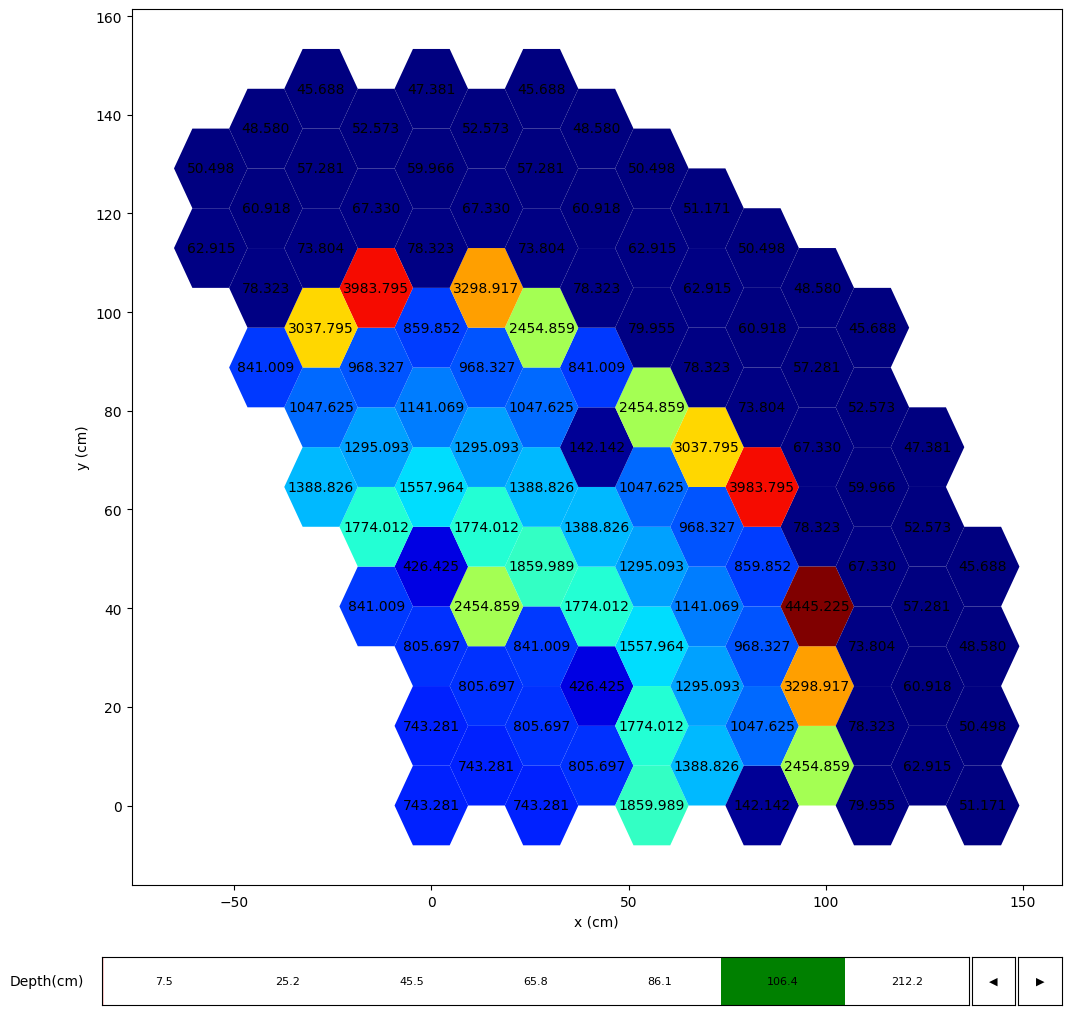

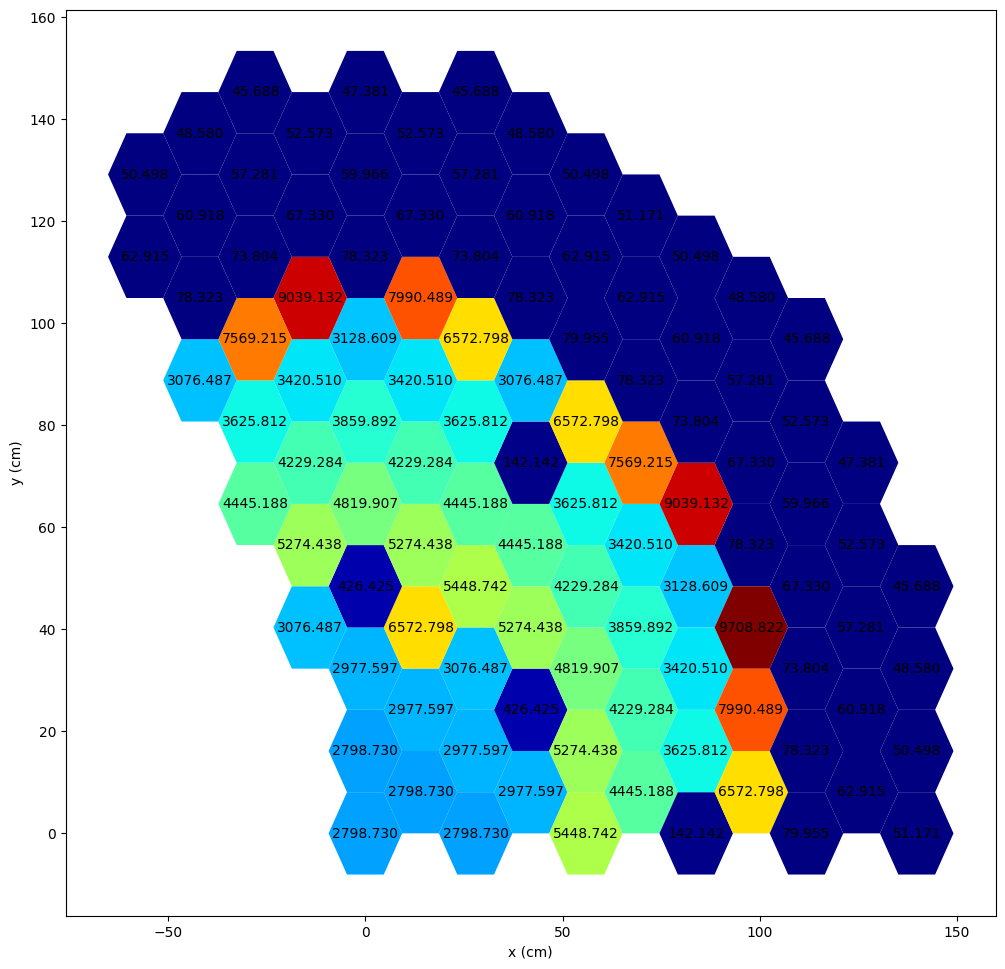

In [19]:
plotting.plotBlockDepthMap(core, "power", depthIndex=5)
# You can also plot total assembly params, which are the sum of block params
plotting.plotFaceMap(core, "power", vals='sum')

We can write this new state to DB as well, since we've shuffled the fuel

In [20]:
o.r.p.timeNode +=1
dbi.database.writeToDB(o.r)
dbi.database.close()

[info] Writing to database for statepoint: /c00n01


## Loading from the database
Once you have a database, you can use it to load a Reactor object from any of the states that were written to it. First, create a Database3 object, then open it and call its `load()` method.

In [21]:
from armi.bookkeeping import db
databaseLocation = "anl-afci-177.h5"
cycle, timeNode = 0, 1
dbo = db.databaseFactory(databaseLocation, "r")
with dbo:
    # Load a new reactor object from the requested cycle and time node
    r = dbo.load(cycle, timeNode)

[info] Loading reactor state for time node (0, 1)
[info] Applying <Migration from 0.1.2: Removes now-invalid `centers:` lines fro...
[info] Removing `centers:` sections.
[info] Applying <Migration from 0.1.2: Update elemental nuclide flags....


=========== Initializing Mesh, Assembly Zones, and Nuclide Categories =========== 
[info] Nuclide categorization for cross section temperature assignments:
       ------------------  -----------------------------------------------------------
       Nuclide Category    Nuclides
       ------------------  -----------------------------------------------------------
       Fuel                ZR96, AM242, PU240, CM244, PU238, ZR91, U236, PU236, NP237,
                           CM246, LFP41, PU239, AM241, CM247, PU242, DUMP2, ZR92,
                           ZR94, U234, CM245, LFP35, LFP40, LFP39, LFP38, U238,
                           AM243, CM242, NP238, U235, DUMP1, PU241, ZR90, CM243
       Coolant             NA23
       Structure           W183, SI29, NI64, MO96, NI62, CR53, NI60, NI58,
                           FE56, W182, CR50, MO97, FE57, MO95, SI28, NI61,
                           C, CR52, MO98, CR54, MN55, W186, FE54, MO92,
                           B10, FE58, B11, V, MO94,

We can see that the time node is what we expect (node 1), and there is some fission product mass since we loaded from a cycle after a depletion step.

In [22]:
print(r.p.timeNode)
print(o.r.getFissileMass())

1
908855.5902822538


Having Reactor object by itself can be very useful for all sorts of post-processing tasks. However, sometimes we may wish initialize more ARMI components to do more advanced tasks and interactive follow-on analysis.  Lucky for us, the database stores the settings that were used to run the case in the first place. We can get them like this:

In [23]:
with dbo:
    cs = dbo.loadCS()
    print(cs["neutronicsKernel"])
    

DIF3D-Nodal


With this `CaseSettings` object, we could create a brand new `Case` and `Operator` and do all sorts of magic. This way of interacting with ARMI is rather advanced, and beyond the scope of this tutorial.

That's just a brief exploration of the data model. Hopefully it helped orient you to the underlying ARMI structure.